<a href="https://colab.research.google.com/github/Sumanth-Mahabaleshwar-Bhat/SpecialTopicsML-Winter2022/blob/main/Sumanth_Mahabaleshwar_Bhat_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Loading of Wisconsin breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#print(cancer.DESCR)
X, t = load_breast_cancer(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 1/4, random_state = 65)

In [ ]:
# Implementation of Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#separate training data for different classes
#class 0
i0 = np.asarray(np.nonzero(t_train==0)) #indexes where class is 0
#print(i0)
[m,n] = i0.shape
X_train_0 = np.zeros((n,30))
t_train_0 = np.zeros(n)
#print(t_train_0)
for i in range(n):
    X_train_0[i,:] = X_train[i0[0,i],:]
#print(X_train_0)

#class 1
i1 = np.asarray(np.nonzero(t_train==1)) #indexes where class is 0
#print(i1)
[m,n1] = i1.shape
#print(n)
X_train_1 = np.zeros((n1,30))
t_train_1 = np.ones(n1)
#print(t_train_1)
for i in range(n1):
    X_train_1[i,:] = X_train[i1[0,i],:]
#print(X_train_1)

In [ ]:
#separate test data for different classes
#class 0
i0 = np.asarray(np.nonzero(t_test==0)) #indexes where class is 0
#print(i0)
[mm,nn] = i0.shape
X_test_0 = np.zeros((nn,30))
t_test_0 = np.zeros(nn)
#print(t_test_0)
for i in range(nn):
    X_test_0[i,:] = X_test[i0[0,i],:]
#print(X_test_0)

#class 1
i1 = np.asarray(np.nonzero(t_test==1)) #indexes where class is 0
#print(i1)
[mm,nn1] = i1.shape
#print(nn1)
X_test_1 = np.zeros((nn1,30))
t_test_1 = np.ones(nn1)
#print(t_test_1)
for i in range(nn1):
    X_test_1[i,:] = X_test[i1[0,i],:]
#print(X_test_1)

In [ ]:
N=n+n1
X_train_2class = np.zeros((N,30))
t_train_2class = np.zeros(N)
X_train_2class = np.concatenate((X_train_0,X_train_1), axis=0)
t_train_2class = np.concatenate((t_train_0,t_train_1), axis=0)
print(X_train_2class.shape)
print(t_train_2class.shape)

(426, 30)
(426,)


In [ ]:
# test set: select only classes 1 and 2; change 2 to 1, 1 to 0
M=nn+nn1
X_valid_2class = np.zeros((M,30))
t_valid_2class = np.zeros(M)
X_valid_2class = np.concatenate((X_test_0,X_test_1), axis=0)
t_valid_2class = np.concatenate((t_test_0,t_test_1), axis=0)
print(X_valid_2class.shape)
print(t_valid_2class.shape)

(143, 30)
(143,)


In [ ]:
#training with gradient descent
#new_col=np.ones(N)
#X1_train_2class = np.insert(X_train_2class, 0, new_col, axis = 1) #added the dummy column
X1_train_2class = X_train_2class
X1_valid_2class = X_valid_2class
#new_col=np.ones(M)
#X1_valid_2class = np.insert(X_valid_2class, 0, new_col, axis = 1) #added the dummy column
w = np.arange(30)
gr = np.zeros(30)
z = np.zeros(N)
z_v = np.zeros(N)
y = np.zeros(N)
IT = 8000 # number of iterations of GD
cost = np.zeros(IT)
cost_valid = np.zeros(IT)
alpha = 0.1 # learning rate
for n in range(IT):
    #compute gradient
    z = np.dot(X1_train_2class,w)
    z_v = np.dot(X1_valid_2class,w)
    y  = 1/(1 + np.exp(-z))
    diff = y -  t_train_2class
    gr = np.dot(X1_train_2class.T,diff)/N # gradient
    # update w
    w = w - alpha * gr
    # compute the current cost on the training set
    for i in range(N):
        cost[n] += t_train_2class[i] * np.logaddexp(0,-z[i]) + (1-t_train_2class[i]) * np.logaddexp(0,z[i])
    cost[n] /= N
    # compute the current cost on the validation set
    for i in range(M):
        cost_valid[n] += t_valid_2class[i] * np.logaddexp(0,-z_v[i]) + (1-t_valid_2class[i]) * np.logaddexp(0,z_v[i])
    cost_valid[n] /= M
print("Vector Parameters : ",w)

Vector Parameters :  [ -8.3809559  -12.49723689  -6.94063418  -8.3741053   -4.19599451
  -4.77840733 -15.71573887 -11.01825215  -5.12208855   1.92568739
  -9.47949465   5.23786594  -5.85724899  -4.97243309  -2.21853654
   2.58766813   2.33330882   4.66619231   5.27884032   8.57194786
   2.31515068  -2.64245045   4.19624586   3.72456377  -3.7989735
   1.55869951  -3.00141554   1.70219699  -6.73983266   3.38660982]


Text(0.5, 0, 'iteration number')

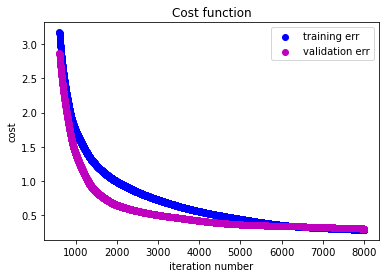

In [ ]:
#plotting the learning curves
init = 600
lin = np.linspace(init+1,IT,IT-init)
plt.scatter(lin, cost[init:], color = 'blue', label='training err')
plt.scatter(lin, cost_valid[init:], color = 'm', label='validation err')
plt.title('Cost function')
plt.legend()
plt.ylabel('cost')
plt.xlabel('iteration number')

F1 Score :  0.5663926896327786
Misclassification error :  0.43360731036722144


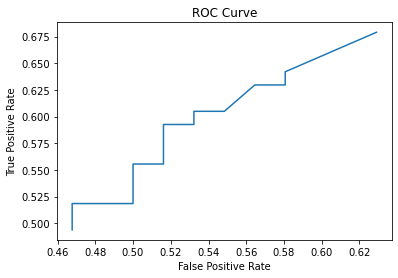

In [ ]:
z = np.matmul(X_test,w.T)
c = np.ones(z.shape[0])
z1 = np.sort(z)
precision=[]
recall=[]
sensitivity=[]
specificty=[]
tpr=[]
fpr=[]
f1_score = 0
for j in range(z1.shape[0]):
    for i in range(z1.shape[0]):
        if z1[i]<=(z1[j]/10):
            c[i]=0
    tp=fp=fn=tn=0
    for k in range(c.shape[0]):
        if(c[k]==t_test[k]):
            if(c[k]==0):
                tn+=1
            else:
                tp+=1
        else:
            if(c[k]==0 and t_test[k]==1):
                fn+=1
            elif(c[k]==1 and t_test[k]==0):
                fp+=1
    precision.append((tp/(tp + fp)))
    recall.append((tp/(tp + fn)))
    sensitivity.append((tp/(tp + fn)))
    specificty.append((tn/(tn + fp)))
    tpr.append((tp/(tp + fn)))
    fpr.append((fp/(fp + tn)))
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
precision = np.average(precision)
recall = np.average(recall)
f1_score = 2*((precision*recall)/(precision + recall))
print("F1 Score : ", f1_score)
print("Misclassification error : ", 1-f1_score)

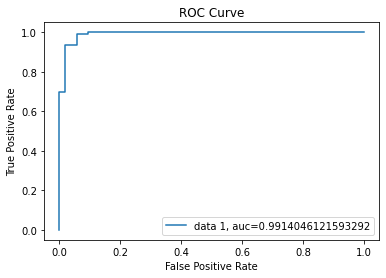

F1 Score :  0.9550314465408805
Misclassified errors :  0.007042253521125938


In [ ]:
# Implementation of Logistic Regression using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train,X_test,y_train,y_test=train_test_split(X,t,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()
precision=[]
recall=[]
sensitivity=[]
specificty=[]
print("F1 Score : ", f1_score(y_test, y_pred, average='macro'))
misclassified_errors_logreg = 0
for i in range(len(y_pred_logreg)):
    if y_pred_logreg[i]!= y_test[i]:
        misclassified_errors_logreg = (misclassified_errors_logreg + 1)/len(y_pred_logreg)
print("Misclassified errors : ", misclassified_errors_logreg)

In [ ]:
# Implementation of KNN Classifier using sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
X_train,X_test,y_train,y_test=train_test_split(X,t,test_size=0.25,random_state=0)
neighbors = []
cv_scores = []
err_scores = []
# perform 5 fold cross validation
for k in range(1, 10, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    loss = abs(cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    err_scores.append(loss.mean())

Cross validation error is 
[0.07991792065663475, 0.07283173734610124, 0.07291381668946648, 0.07053351573187415, 0.06582763337893296]
The optimal number of neighbors is  9 


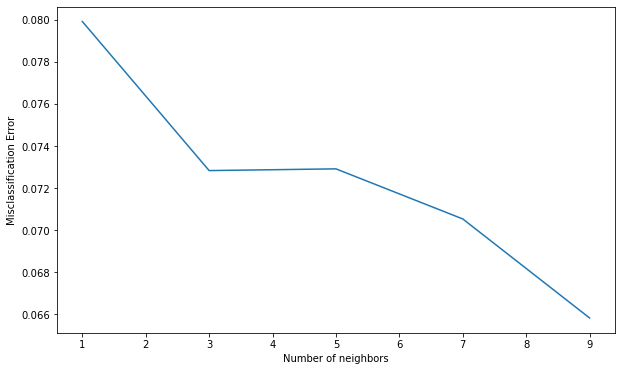

F1 Score :  0.9546703296703296
Misclassification Error :  0.007042253521125938


In [ ]:
MSE = [1-x for x in cv_scores]
print('Cross validation error is ')
print(err_scores)
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()
print("F1 Score : ", f1_score(y_test, y_pred_knn, average='macro'))
misclassification_errors = 0
for i in range(len(y_pred_knn)):
    if y_pred_knn[i] != y_test[i]:
        misclassification_errors = (misclassification_errors + 1)/len(y_pred_knn)
print("Misclassification Error : ",misclassification_errors)

In [ ]:
# Implementation of KNN Classifier
X_train, X_valid, t_train, t_valid = train_test_split(X, t, test_size = 1/4, random_state = 2)
from math import sqrt
def Euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2            #(x1-x2)**2+(y1-y2)**2
    return sqrt(distance)

def Get_Neighbors(train, test_row, num):
    distance = list()
    data = []
    for i in train:
        dist = Euclidean_distance(test_row, i)
        distance.append(dist)
        data.append(i)
    distance = np.array(distance)
    data = np.array(data)
    #finding index of min distance
    index_dist = distance.argsort()
    data = data[index_dist]
    neighbors = data[:num]
    return neighbors

def predict_classification(train, test_row, num):
    Neighbors = Get_Neighbors(train, test_row, num)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)
    return prediction

y_pred = np.zeros(len(X_valid))
y_true = t_valid
acc_val = []
mis_val = []
for k in range(1, 10, 2):
    for i in range(len(X_valid)):
        y_pred[i] = predict_classification(X_train, X_valid[i], k)
        y_pred[i] = y_pred[i]*10
        if y_pred[i] >= 0.7:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    n_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_true)
    mis = 1 - acc
    acc_val.append(acc)
    mis_val.append(mis)
print("Accuracy value : ", acc_val)
print("Misclassification value : ", mis_val)

Accuracy value :  [0.5314685314685315, 0.5314685314685315, 0.5314685314685315, 0.5454545454545454, 0.5524475524475524]
Misclassification value :  [0.46853146853146854, 0.46853146853146854, 0.46853146853146854, 0.4545454545454546, 0.4475524475524476]


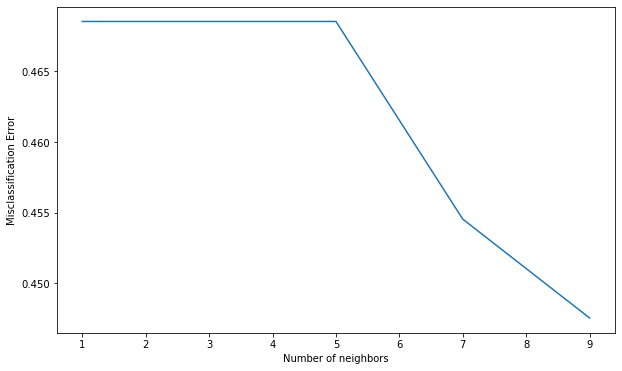

F1 Score :  0.5478671020577413
Misclassification Errors :  0.007042253521126761


In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(neighbors, mis_val)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()
print("F1 Score : ", f1_score(t_valid, y_pred, average='macro'))
misclassification_errors_knn = 0
for i in range(len(y_pred)):
    if y_pred[i]!= t_valid[i]:
        misclassification_errors_knn = (misclassification_errors_knn + 1)/len(y_pred)
print("Misclassification Errors : ", misclassification_errors_knn)